In [1]:
import os
import sys
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import magcolloids as mgc

sys.path.insert(0, '../icenumerics')

import icenumerics as ice

# Vertex Count

    In this script, I will analyze the vertex count in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.042 mT/s (1200 s) and then decreasing from 50 mT to 0 mT with the same rate. Then, we are analyzing the output data of Script-5.0.
    
    I will also analyze the particles' histogram, to check if particles are located on the hill.

In [2]:
rate = 25/1200

In [3]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-5.0"

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2400s_1cycle_HigherHill_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2400s_1cycle_HigherHill_l10_exp0.dat
ACI_CairoLattice_25mT-2400s_1cycle_HigherHill_l10_exp1.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4      -2 -1.000000   
           28    704.625685 -417.196014             3       1  1.000000   
           47    440.070723 -115.898809             4      -2  1.000000   
           48    347.420541 -115.904316             4       0  0.000000   
           49    324.265015 -102.505692             3      -1 -1.732051   
...                     ...         ...           ...     ...       ...   
1   240000 1199  426.684724 -602.604004             3       1 -2.000000   
           1200  416.911987 -566.024860             3      -1  0.000000   
           1202  175.521088  -92.704002             3      -1  1.000000   
           1203  195.066852  -92.704002             3       1  1.000000   
           1205  787.500000 -731.857662             3      -1  0.000000   

                       dy  
Exp frame  id              
0   0      25    1.732051  
           28    1.732051  
           47    1.732051  
           48    0.000000  
           49    1.000000  
...                   ...  
1   240000 1199  0.000000  
           1200 -2.000000  
           1202 -1.732051  
           1203  1.732051  
           1205  2.000000  

[325832 rows x 6 columns]

In [8]:
x_min = 95
y_min = -75

width = 700
hight = -700

x_max = x_min+width
y_max = y_min+hight

print(x_min,x_max,y_min,y_max)

95 795 -75 -775


In [9]:
Ca = Cairo_exp.loc[(Cairo_exp['x']<x_max) & (Cairo_exp['x']>x_min)]
Cairo_exp = Ca.loc[(Ca['y']>y_max) & (Ca['y']<y_min)]

In [10]:
Cairo_exp["type"] = np.NaN

# 4-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==-4, "type"] = "Q = -4"
Cairo_exp.loc[Cairo_exp.charge==-2, "type"] = "Q = -2"
Cairo_exp.loc[Cairo_exp.charge==+2, "type"] = "Q = +2"
Cairo_exp.loc[Cairo_exp.charge==+4, "type"] = "Q = +4"

zeroq = Cairo_exp.charge==0

dipole_magnitude = np.sqrt(Cairo_exp[zeroq].dx**2+Cairo_exp[zeroq].dy**2)

Cairo_exp.loc[zeroq & (dipole_magnitude<1), "type"] = "Q = 0"
Cairo_exp.loc[zeroq & (dipole_magnitude>2) , "type"] = "Q = 0"

# 3-fold vertices classification

Cairo_exp.loc[Cairo_exp.charge==+1, "type"] = "Q = +1"
Cairo_exp.loc[Cairo_exp.charge==-1, "type"] = "Q = -1"
Cairo_exp.loc[Cairo_exp.charge==+3, "type"] = "Q = +3"
Cairo_exp.loc[Cairo_exp.charge==-3, "type"] = "Q = -3"

In [11]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Q = -4", "Q = -2", "Q = 0", "Q = +2", "Q = +4","Q = +1","Q = -1","Q = +3","Q = -3" ]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

Cairo_exp["mean"]= 0

In [12]:
Cairo_exp['field'] = Cairo_exp.index.get_level_values('frame')
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4      -2 -1.000000   
           28    704.625685 -417.196014             3       1  1.000000   
           47    440.070723 -115.898809             4      -2  1.000000   
           48    347.420541 -115.904316             4       0  0.000000   
           49    324.265015 -102.505692             3      -1 -1.732051   
...                     ...         ...           ...     ...       ...   
1   240000 1199  426.684724 -602.604004             3       1 -2.000000   
           1200  416.911987 -566.024860             3      -1  0.000000   
           1202  175.521088  -92.704002             3      -1  1.000000   
           1203  195.066852  -92.704002             3       1  1.000000   
           1205  787.500000 -731.857662             3      -1  0.000000   

                       dy    type  mean   field  
Exp frame  id                                    
0   0      25    1.732051  Q = -2     0       0  
           28    1.732051  Q = +1     0       0  
           47    1.732051  Q = -2     0       0  
           48    0.000000   Q = 0     0       0  
           49    1.000000  Q = -1     0       0  
...                   ...     ...   ...     ...  
1   240000 1199  0.000000  Q = +1     0  240000  
           1200 -2.000000  Q = -1     0  240000  
           1202 -1.732051  Q = -1     0  240000  
           1203  1.732051  Q = +1     0  240000  
           1205  2.000000  Q = -1     0  240000  

[325832 rows x 9 columns]

In [13]:
count_m = Cairo_exp.loc[:,["type","field","coordination"]].groupby(["Exp","field","coordination"]).apply(count_types)
increase = (count_m/Cairo_exp.groupby(["Exp","field","coordination"]).count()).filter(["mean"])

In [14]:
a = increase.query('mean != 0')

In [15]:
a = a.reset_index()
del a['coordination']
a = a.set_index(['Exp', 'field','type'])
a

mean
Exp field  type            
0   0      Q = +1  0.383592
           Q = +3  0.128603
           Q = -1  0.376940
           Q = -3  0.110865
           Q = +2  0.208889
...                     ...
1   240000 Q = -1  0.512195
           Q = -3  0.019956
           Q = +2  0.071111
           Q = -2  0.057778
           Q = 0   0.871111

[3656 rows x 1 columns]

In [16]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [17]:
field = np.linspace(0,240000,75)


vert_prop_evenspace_m = a.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [18]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [19]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato",
                                                    "red","black"]) 

In [20]:
240000/100

2400.0

In [21]:
v_counts_m['time'] = v_counts_m.index.get_level_values('field')/100

In [22]:
v_counts_m

mean       err    time
field    type                              
0.0      Q = +1  0.371397  0.012195     0.0
         Q = +2  0.246667  0.037778     0.0
         Q = +3  0.126386  0.002217     0.0
         Q = +4  0.066667  0.004444     0.0
         Q = -1  0.374723  0.002217     0.0
...                   ...       ...     ...
240000.0 Q = -1  0.514412  0.002217  2400.0
         Q = -2  0.057778  0.000000  2400.0
         Q = -3  0.019956  0.000000  2400.0
         Q = -4  0.004444  0.000000  2400.0
         Q = 0   0.846667  0.024444  2400.0

[675 rows x 3 columns]

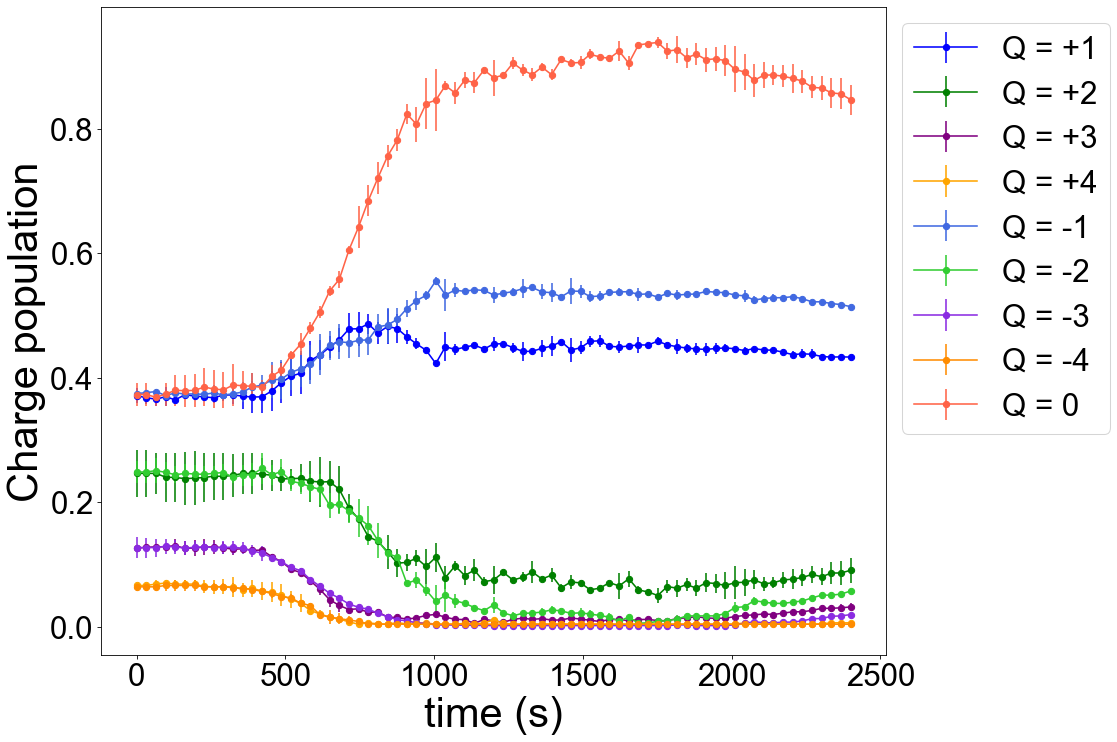

In [23]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m.groupby('type'):
    
    plt.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 30, bbox_to_anchor=(1, 1))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

plt.tight_layout()

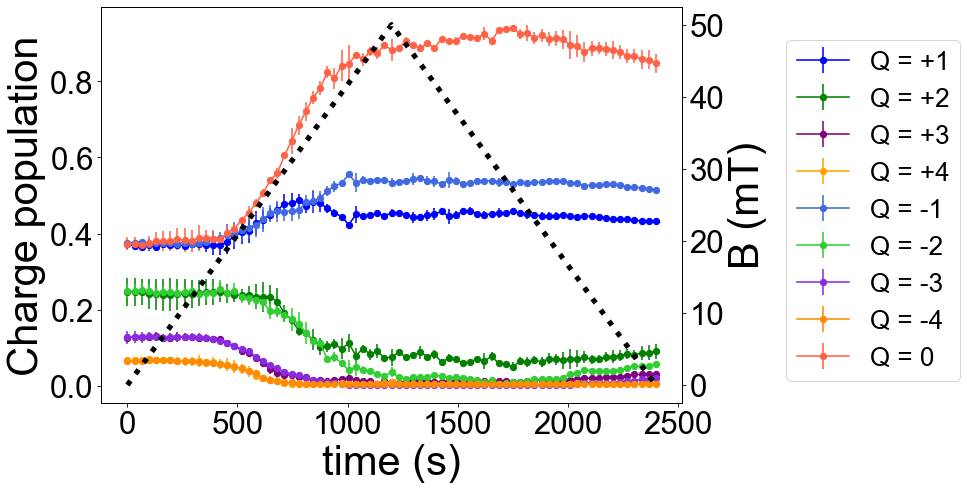

In [24]:
fig, ax1 = plt.subplots(figsize=(10,7))

ax2 = ax1.twinx()

ax2.plot([0,1200,2400],[0,50,0],':', color = 'black', lw = 5)

for typ_m, mtype in v_counts_m.groupby('type'):
    
    ax1.errorbar(mtype['time'], mtype["mean"],yerr = mtype["err"], fmt ='-o', label = typ_m)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('time (s)', size = 40)
ax1.set_ylabel('Charge population', size = 40)




ax2.set_ylabel('B (mT)', size = 40)
ax2.tick_params(axis='y', labelsize=30)

plt.show()